## Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

## Variable&emsp;&emsp;&emsp;&nbsp;              Description<br><br>
Loan_ID&emsp;&emsp;&emsp;&ensp;&nbsp;&emsp;         &emsp; &emsp;   Unique Loan ID<br>
Gender&emsp;&emsp;&emsp;&emsp;&nbsp;&emsp; &emsp; &emsp;                Male/ Female<br>
Married&emsp;&emsp;&emsp;&emsp;&nbsp;&emsp;              &emsp; &emsp;  Applicant married (Y/N)<br>
Dependents&emsp;&emsp;&nbsp;&emsp;   &emsp; &emsp;        Number of dependents<br>
Education&emsp;&emsp;&emsp;&nbsp;&emsp;            &emsp; &emsp;  Applicant Education (Graduate/ Under Graduate)<br>
Self_Employed&emsp;&emsp;    &emsp; &emsp;     Self employed (Y/N)<br>
ApplicantIncome&ensp;&emsp;    &emsp; &emsp;   Applicant income<br>
CoapplicantIncome &emsp; &emsp;&nbsp;    Coapplicant income<br>
LoanAmount  &emsp; &emsp;  &emsp; &emsp; &nbsp;        Loan amount in thousands<br>
Loan_Amount_Term &emsp; &emsp;     Term of loan in months<br>
Credit_History  &emsp; &emsp; &emsp;  &emsp;     credit history meets guidelines<br>
Property_Area &emsp; &emsp; &emsp; &emsp;        Urban/ Semi Urban/ Rural<br>
Loan_Status (Target)&emsp; &emsp;  Loan approved (Y/N)<br>


## Task: You are asked to predict loan eligibility using Ensemble Learning algorithms such as Voting, BaggingClassifier, GradientBoostingClassifier, XGBClassifier, Lightgbm, CatBoostClassifier.

In [1]:
import pandas as pd
from sklearn import metrics

In [2]:
data = pd.read_csv("loan_prediction.csv")
df = data.copy()

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df = df.dropna()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [49]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [50]:
df['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [51]:
import matplotlib.pyplot as plt

(array([ 42., 194., 153.,  49.,  22.,   8.,   3.,   3.,   3.,   3.]),
 array([  9. ,  68.1, 127.2, 186.3, 245.4, 304.5, 363.6, 422.7, 481.8,
        540.9, 600. ]),
 <BarContainer object of 10 artists>)

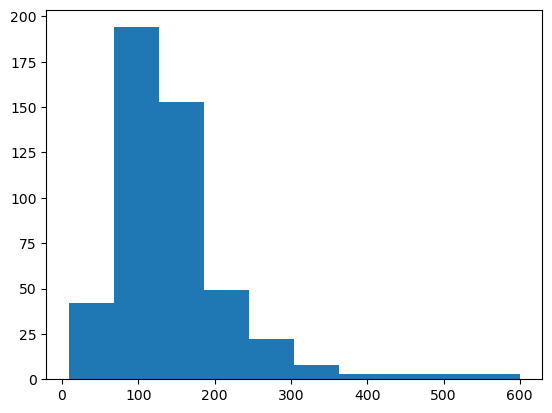

In [52]:
plt.hist(df['LoanAmount'])

In [53]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


(array([412.,  53.,  10.,   0.,   4.,   0.,   0.,   0.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

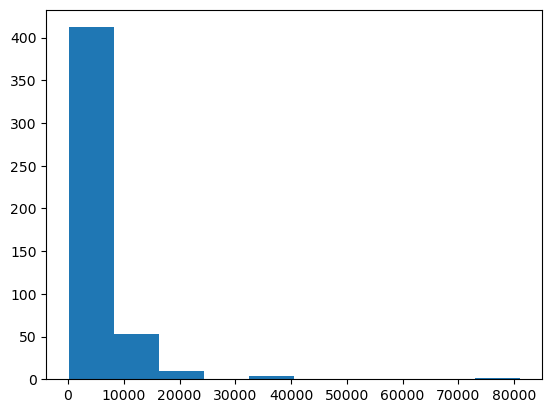

In [54]:
plt.hist(df['ApplicantIncome'])

(array([418.,  49.,   8.,   2.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([    0. ,  3383.7,  6767.4, 10151.1, 13534.8, 16918.5, 20302.2,
        23685.9, 27069.6, 30453.3, 33837. ]),
 <BarContainer object of 10 artists>)

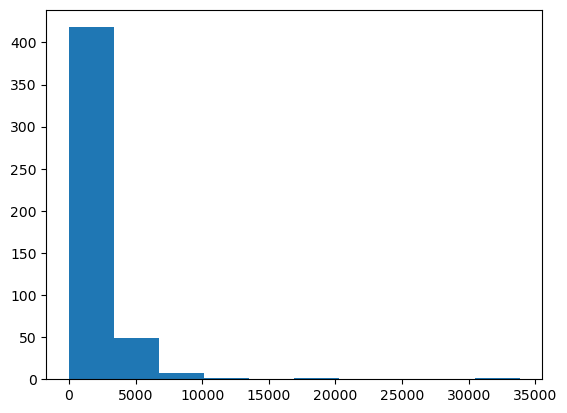

In [55]:
plt.hist(df['CoapplicantIncome'])

(array([ 42., 194., 153.,  49.,  22.,   8.,   3.,   3.,   3.,   3.]),
 array([  9. ,  68.1, 127.2, 186.3, 245.4, 304.5, 363.6, 422.7, 481.8,
        540.9, 600. ]),
 <BarContainer object of 10 artists>)

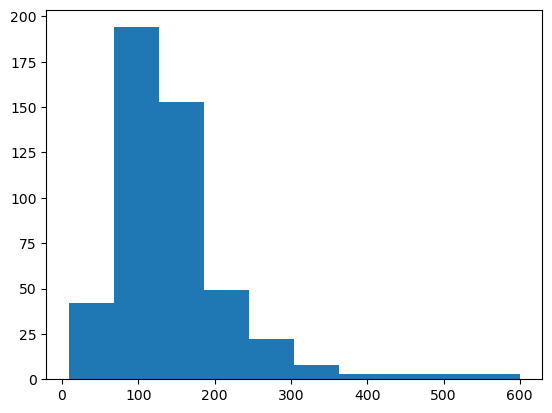

In [56]:
plt.hist(df['LoanAmount'])

In [57]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import numpy as np

In [58]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [59]:
df['Property_Area'].unique() #1,2,3

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [6]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Property_Area'] = df['Property_Area'].map({'Rural': 1, 'Urban': 2, 'Semiurban': 3})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [18]:
print(df.dtypes)

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


In [19]:
df.shape

(480, 13)

In [20]:
df = df.drop('Loan_ID', axis=1)

In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [22]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
df.shape

(480, 12)

In [25]:
df['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [26]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
df.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [36]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df.drop(['Loan_Status','Dependents'], axis=1)
y = df['Loan_Status']

model = LogisticRegression()

rfe = RFE(model, n_features_to_select=5)  # Select top 5 features

rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['Gender', 'Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object')


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

## I dropped 'Dependents' because it caused an error due to its type being 'object'.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


X = df.drop(['Loan_Status', 'Dependents'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features_to_select = 5
selector = SelectKBest(score_func=chi2, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(kernel='linear'))
], voting='hard')

bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
gradient_boosting_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()
catboost_classifier = CatBoostClassifier()

voting_classifier.fit(X_train_selected, y_train)
bagging_classifier.fit(X_train_selected, y_train)
gradient_boosting_classifier.fit(X_train_selected, y_train)
xgb_classifier.fit(X_train_selected, y_train)
lgbm_classifier.fit(X_train_selected, y_train)
catboost_classifier.fit(X_train_selected, y_train)

voting_accuracy = voting_classifier.score(X_test_selected, y_test)
bagging_accuracy = bagging_classifier.score(X_test_selected, y_test)
gradient_boosting_accuracy = gradient_boosting_classifier.score(X_test_selected, y_test)
xgb_accuracy = xgb_classifier.score(X_test_selected, y_test)
lgbm_accuracy = lgbm_classifier.score(X_test_selected, y_test)
catboost_accuracy = catboost_classifier.score(X_test_selected, y_test)

print("Voting Classifier Accuracy:", voting_accuracy)
print("Bagging Classifier Accuracy:", bagging_accuracy)
print("Gradient Boosting Classifier Accuracy:", gradient_boosting_accuracy)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
print("LightGBM Classifier Accuracy:", lgbm_accuracy)
print("CatBoost Classifier Accuracy:", catboost_accuracy)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 264, number of negative: 120
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.687500 -> initscore=0.788457
[LightGBM] [Info] Start training from score 0.788457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

110:	learn: 0.4997594	total: 327ms	remaining: 2.62s
111:	learn: 0.4990362	total: 329ms	remaining: 2.6s
112:	learn: 0.4980431	total: 331ms	remaining: 2.6s
113:	learn: 0.4974343	total: 332ms	remaining: 2.58s
114:	learn: 0.4964149	total: 334ms	remaining: 2.57s
115:	learn: 0.4959218	total: 335ms	remaining: 2.56s
116:	learn: 0.4949002	total: 337ms	remaining: 2.54s
117:	learn: 0.4939109	total: 339ms	remaining: 2.54s
118:	learn: 0.4933248	total: 341ms	remaining: 2.52s
119:	learn: 0.4926055	total: 342ms	remaining: 2.51s
120:	learn: 0.4913648	total: 345ms	remaining: 2.5s
121:	learn: 0.4908369	total: 346ms	remaining: 2.49s
122:	learn: 0.4903505	total: 348ms	remaining: 2.48s
123:	learn: 0.4899071	total: 349ms	remaining: 2.47s
124:	learn: 0.4890891	total: 351ms	remaining: 2.46s
125:	learn: 0.4884460	total: 353ms	remaining: 2.45s
126:	learn: 0.4876433	total: 355ms	remaining: 2.44s
127:	learn: 0.4865415	total: 357ms	remaining: 2.43s
128:	learn: 0.4855797	total: 359ms	remaining: 2.42s
129:	learn: 0.4

300:	learn: 0.4083446	total: 722ms	remaining: 1.68s
301:	learn: 0.4077818	total: 725ms	remaining: 1.68s
302:	learn: 0.4075984	total: 727ms	remaining: 1.67s
303:	learn: 0.4070578	total: 729ms	remaining: 1.67s
304:	learn: 0.4066105	total: 732ms	remaining: 1.67s
305:	learn: 0.4063752	total: 734ms	remaining: 1.66s
306:	learn: 0.4061238	total: 736ms	remaining: 1.66s
307:	learn: 0.4057628	total: 739ms	remaining: 1.66s
308:	learn: 0.4055320	total: 742ms	remaining: 1.66s
309:	learn: 0.4051955	total: 744ms	remaining: 1.66s
310:	learn: 0.4051674	total: 745ms	remaining: 1.65s
311:	learn: 0.4051168	total: 747ms	remaining: 1.65s
312:	learn: 0.4048523	total: 749ms	remaining: 1.64s
313:	learn: 0.4045844	total: 751ms	remaining: 1.64s
314:	learn: 0.4042156	total: 754ms	remaining: 1.64s
315:	learn: 0.4039294	total: 756ms	remaining: 1.64s
316:	learn: 0.4037309	total: 758ms	remaining: 1.63s
317:	learn: 0.4035302	total: 760ms	remaining: 1.63s
318:	learn: 0.4032903	total: 762ms	remaining: 1.63s
319:	learn: 

469:	learn: 0.3650244	total: 1.12s	remaining: 1.26s
470:	learn: 0.3647872	total: 1.12s	remaining: 1.26s
471:	learn: 0.3646435	total: 1.12s	remaining: 1.26s
472:	learn: 0.3643959	total: 1.13s	remaining: 1.25s
473:	learn: 0.3641443	total: 1.13s	remaining: 1.25s
474:	learn: 0.3641396	total: 1.13s	remaining: 1.25s
475:	learn: 0.3639350	total: 1.13s	remaining: 1.25s
476:	learn: 0.3636255	total: 1.14s	remaining: 1.24s
477:	learn: 0.3633791	total: 1.14s	remaining: 1.24s
478:	learn: 0.3632711	total: 1.14s	remaining: 1.24s
479:	learn: 0.3629940	total: 1.14s	remaining: 1.24s
480:	learn: 0.3628441	total: 1.14s	remaining: 1.23s
481:	learn: 0.3626163	total: 1.15s	remaining: 1.23s
482:	learn: 0.3622215	total: 1.15s	remaining: 1.23s
483:	learn: 0.3621948	total: 1.15s	remaining: 1.23s
484:	learn: 0.3617236	total: 1.15s	remaining: 1.22s
485:	learn: 0.3613760	total: 1.15s	remaining: 1.22s
486:	learn: 0.3613193	total: 1.16s	remaining: 1.22s
487:	learn: 0.3611619	total: 1.16s	remaining: 1.22s
488:	learn: 

636:	learn: 0.3327167	total: 1.51s	remaining: 859ms
637:	learn: 0.3326064	total: 1.51s	remaining: 856ms
638:	learn: 0.3324340	total: 1.51s	remaining: 854ms
639:	learn: 0.3323118	total: 1.51s	remaining: 852ms
640:	learn: 0.3321089	total: 1.52s	remaining: 850ms
641:	learn: 0.3318943	total: 1.52s	remaining: 848ms
642:	learn: 0.3317309	total: 1.52s	remaining: 846ms
643:	learn: 0.3315869	total: 1.52s	remaining: 843ms
644:	learn: 0.3314224	total: 1.53s	remaining: 841ms
645:	learn: 0.3312175	total: 1.53s	remaining: 839ms
646:	learn: 0.3309130	total: 1.53s	remaining: 836ms
647:	learn: 0.3307140	total: 1.53s	remaining: 834ms
648:	learn: 0.3306496	total: 1.54s	remaining: 831ms
649:	learn: 0.3305256	total: 1.54s	remaining: 829ms
650:	learn: 0.3301880	total: 1.54s	remaining: 827ms
651:	learn: 0.3299386	total: 1.54s	remaining: 824ms
652:	learn: 0.3297480	total: 1.55s	remaining: 822ms
653:	learn: 0.3296070	total: 1.55s	remaining: 820ms
654:	learn: 0.3294457	total: 1.55s	remaining: 817ms
655:	learn: 

807:	learn: 0.3033745	total: 1.91s	remaining: 454ms
808:	learn: 0.3031627	total: 1.91s	remaining: 451ms
809:	learn: 0.3029683	total: 1.91s	remaining: 449ms
810:	learn: 0.3028418	total: 1.92s	remaining: 446ms
811:	learn: 0.3026325	total: 1.92s	remaining: 444ms
812:	learn: 0.3024982	total: 1.92s	remaining: 442ms
813:	learn: 0.3022935	total: 1.92s	remaining: 439ms
814:	learn: 0.3022083	total: 1.93s	remaining: 437ms
815:	learn: 0.3020806	total: 1.93s	remaining: 435ms
816:	learn: 0.3018121	total: 1.93s	remaining: 432ms
817:	learn: 0.3014872	total: 1.93s	remaining: 430ms
818:	learn: 0.3014768	total: 1.93s	remaining: 427ms
819:	learn: 0.3013816	total: 1.94s	remaining: 425ms
820:	learn: 0.3012495	total: 1.94s	remaining: 423ms
821:	learn: 0.3011475	total: 1.94s	remaining: 420ms
822:	learn: 0.3009623	total: 1.94s	remaining: 418ms
823:	learn: 0.3008280	total: 1.95s	remaining: 416ms
824:	learn: 0.3006472	total: 1.95s	remaining: 413ms
825:	learn: 0.3003253	total: 1.95s	remaining: 411ms
826:	learn: 

971:	learn: 0.2758298	total: 2.3s	remaining: 66.4ms
972:	learn: 0.2757292	total: 2.31s	remaining: 64ms
973:	learn: 0.2755025	total: 2.31s	remaining: 61.6ms
974:	learn: 0.2753949	total: 2.31s	remaining: 59.3ms
975:	learn: 0.2753258	total: 2.31s	remaining: 56.9ms
976:	learn: 0.2752356	total: 2.31s	remaining: 54.5ms
977:	learn: 0.2751345	total: 2.32s	remaining: 52.1ms
978:	learn: 0.2749876	total: 2.32s	remaining: 49.8ms
979:	learn: 0.2749185	total: 2.32s	remaining: 47.4ms
980:	learn: 0.2747542	total: 2.33s	remaining: 45ms
981:	learn: 0.2745548	total: 2.33s	remaining: 42.7ms
982:	learn: 0.2744244	total: 2.33s	remaining: 40.3ms
983:	learn: 0.2742076	total: 2.33s	remaining: 37.9ms
984:	learn: 0.2741338	total: 2.33s	remaining: 35.6ms
985:	learn: 0.2739830	total: 2.34s	remaining: 33.2ms
986:	learn: 0.2738356	total: 2.34s	remaining: 30.8ms
987:	learn: 0.2737864	total: 2.34s	remaining: 28.4ms
988:	learn: 0.2735718	total: 2.34s	remaining: 26.1ms
989:	learn: 0.2735202	total: 2.35s	remaining: 23.7m

## ----------------------------------------------------------------------------------------------------------------------------------

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [65]:
df.shape

(480, 13)

In [8]:
df = df.drop('Loan_ID', axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


df['Dependents'].fillna('0', inplace=True)  # Replace NaNs with 0

# Preprocess 'Dependents' column
dependents_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
df['Dependents'] = df['Dependents'].map(dependents_mapping)

df.dropna(inplace=True)

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features_to_select = 5
selector = SelectKBest(score_func=chi2, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(kernel='linear'))
], voting='hard')


bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
gradient_boosting_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()
catboost_classifier = CatBoostClassifier()


voting_classifier.fit(X_train_selected, y_train)
bagging_classifier.fit(X_train_selected, y_train)
gradient_boosting_classifier.fit(X_train_selected, y_train)
xgb_classifier.fit(X_train_selected, y_train)
lgbm_classifier.fit(X_train_selected, y_train)
catboost_classifier.fit(X_train_selected, y_train)


voting_accuracy = voting_classifier.score(X_test_selected, y_test)
bagging_accuracy = bagging_classifier.score(X_test_selected, y_test)
gradient_boosting_accuracy = gradient_boosting_classifier.score(X_test_selected, y_test)
xgb_accuracy = xgb_classifier.score(X_test_selected, y_test)
lgbm_accuracy = lgbm_classifier.score(X_test_selected, y_test)
catboost_accuracy = catboost_classifier.score(X_test_selected, y_test)


print("Voting Classifier Accuracy:", voting_accuracy)
print("Bagging Classifier Accuracy:", bagging_accuracy)
print("Gradient Boosting Classifier Accuracy:", gradient_boosting_accuracy)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
print("LightGBM Classifier Accuracy:", lgbm_accuracy)
print("CatBoost Classifier Accuracy:", catboost_accuracy)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 264, number of negative: 120
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.687500 -> initscore=0.788457
[LightGBM] [Info] Start training from score 0.788457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

120:	learn: 0.4913648	total: 328ms	remaining: 2.39s
121:	learn: 0.4908369	total: 330ms	remaining: 2.38s
122:	learn: 0.4903505	total: 332ms	remaining: 2.36s
123:	learn: 0.4899071	total: 333ms	remaining: 2.35s
124:	learn: 0.4890891	total: 335ms	remaining: 2.34s
125:	learn: 0.4884460	total: 336ms	remaining: 2.33s
126:	learn: 0.4876433	total: 338ms	remaining: 2.32s
127:	learn: 0.4865415	total: 340ms	remaining: 2.32s
128:	learn: 0.4855797	total: 342ms	remaining: 2.31s
129:	learn: 0.4851408	total: 344ms	remaining: 2.3s
130:	learn: 0.4842676	total: 346ms	remaining: 2.3s
131:	learn: 0.4832869	total: 348ms	remaining: 2.29s
132:	learn: 0.4821099	total: 351ms	remaining: 2.29s
133:	learn: 0.4810646	total: 353ms	remaining: 2.28s
134:	learn: 0.4801332	total: 355ms	remaining: 2.27s
135:	learn: 0.4793819	total: 357ms	remaining: 2.27s
136:	learn: 0.4787753	total: 359ms	remaining: 2.26s
137:	learn: 0.4780802	total: 361ms	remaining: 2.25s
138:	learn: 0.4770625	total: 363ms	remaining: 2.25s
139:	learn: 0.

331:	learn: 0.3987621	total: 729ms	remaining: 1.47s
332:	learn: 0.3983668	total: 732ms	remaining: 1.47s
333:	learn: 0.3979764	total: 734ms	remaining: 1.46s
334:	learn: 0.3978927	total: 735ms	remaining: 1.46s
335:	learn: 0.3976068	total: 737ms	remaining: 1.46s
336:	learn: 0.3974492	total: 739ms	remaining: 1.45s
337:	learn: 0.3971689	total: 741ms	remaining: 1.45s
338:	learn: 0.3968265	total: 744ms	remaining: 1.45s
339:	learn: 0.3967690	total: 745ms	remaining: 1.45s
340:	learn: 0.3966710	total: 747ms	remaining: 1.44s
341:	learn: 0.3962286	total: 749ms	remaining: 1.44s
342:	learn: 0.3959535	total: 751ms	remaining: 1.44s
343:	learn: 0.3958117	total: 753ms	remaining: 1.44s
344:	learn: 0.3957617	total: 754ms	remaining: 1.43s
345:	learn: 0.3955109	total: 756ms	remaining: 1.43s
346:	learn: 0.3954049	total: 758ms	remaining: 1.43s
347:	learn: 0.3951310	total: 760ms	remaining: 1.42s
348:	learn: 0.3947721	total: 762ms	remaining: 1.42s
349:	learn: 0.3945609	total: 764ms	remaining: 1.42s
350:	learn: 

522:	learn: 0.3543281	total: 1.13s	remaining: 1.03s
523:	learn: 0.3539748	total: 1.13s	remaining: 1.02s
524:	learn: 0.3537697	total: 1.13s	remaining: 1.02s
525:	learn: 0.3536115	total: 1.13s	remaining: 1.02s
526:	learn: 0.3533136	total: 1.13s	remaining: 1.02s
527:	learn: 0.3531402	total: 1.14s	remaining: 1.02s
528:	learn: 0.3527998	total: 1.14s	remaining: 1.01s
529:	learn: 0.3525764	total: 1.14s	remaining: 1.01s
530:	learn: 0.3523328	total: 1.14s	remaining: 1.01s
531:	learn: 0.3520326	total: 1.15s	remaining: 1.01s
532:	learn: 0.3517248	total: 1.15s	remaining: 1.01s
533:	learn: 0.3516426	total: 1.15s	remaining: 1s
534:	learn: 0.3514732	total: 1.15s	remaining: 1s
535:	learn: 0.3512505	total: 1.15s	remaining: 1000ms
536:	learn: 0.3510223	total: 1.16s	remaining: 997ms
537:	learn: 0.3506471	total: 1.16s	remaining: 995ms
538:	learn: 0.3503815	total: 1.16s	remaining: 993ms
539:	learn: 0.3501445	total: 1.16s	remaining: 991ms
540:	learn: 0.3499792	total: 1.16s	remaining: 988ms
541:	learn: 0.349

695:	learn: 0.3224814	total: 1.51s	remaining: 661ms
696:	learn: 0.3223745	total: 1.51s	remaining: 659ms
697:	learn: 0.3221134	total: 1.52s	remaining: 657ms
698:	learn: 0.3219889	total: 1.52s	remaining: 655ms
699:	learn: 0.3218768	total: 1.52s	remaining: 652ms
700:	learn: 0.3216174	total: 1.52s	remaining: 650ms
701:	learn: 0.3214512	total: 1.53s	remaining: 648ms
702:	learn: 0.3213177	total: 1.53s	remaining: 646ms
703:	learn: 0.3210684	total: 1.53s	remaining: 644ms
704:	learn: 0.3209185	total: 1.53s	remaining: 642ms
705:	learn: 0.3206654	total: 1.54s	remaining: 640ms
706:	learn: 0.3205068	total: 1.54s	remaining: 638ms
707:	learn: 0.3203915	total: 1.54s	remaining: 636ms
708:	learn: 0.3202846	total: 1.54s	remaining: 634ms
709:	learn: 0.3201132	total: 1.55s	remaining: 632ms
710:	learn: 0.3198654	total: 1.55s	remaining: 630ms
711:	learn: 0.3196357	total: 1.55s	remaining: 628ms
712:	learn: 0.3194142	total: 1.55s	remaining: 626ms
713:	learn: 0.3191752	total: 1.56s	remaining: 624ms
714:	learn: 

860:	learn: 0.2944150	total: 1.9s	remaining: 307ms
861:	learn: 0.2943111	total: 1.91s	remaining: 305ms
862:	learn: 0.2939390	total: 1.91s	remaining: 303ms
863:	learn: 0.2938251	total: 1.91s	remaining: 301ms
864:	learn: 0.2936273	total: 1.91s	remaining: 299ms
865:	learn: 0.2934604	total: 1.92s	remaining: 297ms
866:	learn: 0.2933474	total: 1.92s	remaining: 294ms
867:	learn: 0.2932839	total: 1.92s	remaining: 292ms
868:	learn: 0.2929820	total: 1.92s	remaining: 290ms
869:	learn: 0.2928069	total: 1.93s	remaining: 288ms
870:	learn: 0.2927191	total: 1.93s	remaining: 286ms
871:	learn: 0.2924192	total: 1.93s	remaining: 284ms
872:	learn: 0.2922413	total: 1.93s	remaining: 281ms
873:	learn: 0.2920245	total: 1.94s	remaining: 279ms
874:	learn: 0.2919357	total: 1.94s	remaining: 277ms
875:	learn: 0.2917529	total: 1.94s	remaining: 275ms
876:	learn: 0.2916074	total: 1.94s	remaining: 273ms
877:	learn: 0.2915192	total: 1.95s	remaining: 270ms
878:	learn: 0.2913090	total: 1.95s	remaining: 268ms
879:	learn: 0